# Hacktiv8 PTP Introduction to Data Science Projects 1: Publication-Grade Plot

Last Updated: December 15, 2021 <br>
Author: Winny Claudia Anggreacia

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016

This dataset contains:<br>
    - lsoa_code : this represents a policing area <br>
    - borough: the london borough for which the statistic is related <br>
    - major_category: the major crime category <br>
    - minor_category: the minor crime category <br>
    - value: the count of the crime for that particular borough, in that particular month <br>
    - year: the year of the summary statistic <br>
    - month: the month of the summary statistic <br>

### The first thing we'll do is import two key data analysis modules: pandas and Numpy.

In [18]:
import numpy as np
import pandas as pd

In [19]:
pd.__version__

'1.2.4'

### Read and Gather Info about Pandas

In [20]:
df_london = pd.read_csv('london_crime_by_lsoa.csv')

print('Data berhasil dibaca')

Data berhasil dibaca


In [21]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            object
 6   month           int64 
dtypes: int64(2), object(5)
memory usage: 720.5+ MB


In [22]:
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [23]:
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [24]:
df_london.shape

(13490604, 7)

In [26]:
df_london.isnull()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


In [27]:
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

### Now, we are going to make one dataset that contains value 1 in value features

#### Create Dataset

In [158]:
crime = df_london[df_london['value']==1]
crime

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


### Visualizing Data using Matplotlib

#### Import matplotlib and matplotlib.pyplot

In [148]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# apply a style to Matplotlib
mpl.style.use('ggplot')

In [149]:
mpl.__version__

'3.3.4'

## <p style="color:blue;"> >> Area Plots </p>

### <p style="color:red;"> Q1: Bagaimana perkembangan kriminalitas di City of London pada tahun 2008-2016 </p>

In [150]:
#daftar borough pada data

df_london['borough'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [168]:
# Pengambilan data borough City of London dari tahun 2008 - 2016

df_city = df_london[(df_london['value']==1) & (df_london['borough']=='City of London')]

In [169]:
df_city.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
29291,E01000003,City of London,Theft and Handling,Other Theft Person,1,2015,5
74471,E01000003,City of London,Theft and Handling,Other Theft Person,1,2015,6
94020,E01032739,City of London,Criminal Damage,Criminal Damage To Motor Vehicle,1,2014,11
108087,E01000002,City of London,Theft and Handling,Other Theft,1,2016,11
137365,E01000005,City of London,Drugs,Possession Of Drugs,1,2015,4


In [170]:
df_city.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13281947,E01000005,City of London,Theft and Handling,Theft From Shops,1,2013,9
13310120,E01000005,City of London,Theft and Handling,Other Theft Person,1,2013,10
13337921,E01032739,City of London,Theft and Handling,Other Theft,1,2011,10
13460312,E01032739,City of London,Theft and Handling,Theft From Shops,1,2016,3
13462832,E01032740,City of London,Theft and Handling,Other Theft Person,1,2013,2


In [171]:
# pengecekan data di tahun 2012 untuk City of London (karena dibawah ada error yg ane)

df_city3 = df_london[(df_london['value']==1) & (df_london['borough']=='City of London') & (df_london['year']==2012)]

In [172]:
# cek tahun 2012 saja. Untuk cek error

df_city3

,lsoa_code,borough,major_category,minor_category,value,year,month
323471,E01032739,City of London,Drugs,Possession Of Drugs,1,2012,7
371178,E01000005,City of London,Theft and Handling,Other Theft,1,2012,4
670563,E01032739,City of London,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,7
799456,E01000002,City of London,Theft and Handling,Other Theft,1,2012,2
817088,E01000005,City of London,Violence Against the Person,Common Assault,1,2012,9
...,...,...,...,...,...,...,...
12726760,E01000001,City of London,Burglary,Burglary in Other Buildings,1,2012,2
12825290,E01032740,City of London,Drugs,Possession Of Drugs,1,2012,1
13181897,E01000005,City of London,Robbery,Personal Property,1,2012,8
13197073,E01000003,City of London,Theft and Handling,Theft From Motor Vehicle,1,2012,2


In [173]:
df_city2=df_city.groupby('year', as_index=True).agg({"value":"sum"})

In [165]:
df_city2

,value
year,
2008,0
2009,0
2010,0
2011,69
2012,156
2013,109
2014,115
2015,150
2016,178


In [174]:
df_city2=df_city.groupby('year', as_index=True).agg({"value":"sum"})

Text(0.5, 0, 'Tahun')

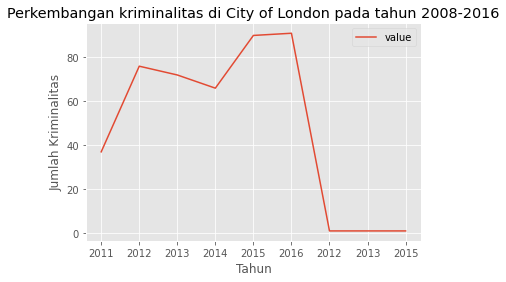

In [175]:
df_city2.plot()

plt.title('Perkembangan kriminalitas di City of London pada tahun 2008-2016')
plt.ylabel('Jumlah Kriminalitas')
plt.xlabel('Tahun')

## <p style="color:green;"> Insight </p>

Dilihat dari grafik diatas, kriminalitas di City of London pada tahun 2008-2019 tidak ada sama sekali. Lalu tindakan kriminal muncul pada tahun 2011 dan mengalami kenaikan serta penurunan sampai tahun 2016

Mohon maaf, saya tidak dapat menemukan penyebab dan cara untuk menggabungkan tahun 2012 dan 2013. Sehingga saat ini 2012 dan 2013 memiliki 2 data

##  <p style="color:blue;"> >> Histogram </p>

### <p style="color:red;"> Q2 Kejahatan Paling Sedikit di Borough pada Tahun 2014 </p>

In [184]:
df_london_pivot= pd.pivot_table(df_london,values='value', index=['borough'], columns=['year'], aggfunc=np.sum)

In [247]:
df_london_pivot['Total']=df_london_pivot.sum(axis=1)
df_london_pivot

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2008,2009,200=,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,17492.0,17543.0,16975.0,16493.0,15859.0,15585.0,15278.0,16169.0,16561.0,164.0,170.0,NaN,155.0,193.0,131.0,174.0,148.0,177.0,180.0,298894.0
Barnet,23671.0,23255.0,23158.0,23763.0,23401.0,22280.0,22360.0,23765.0,24373.0,273.0,193.0,1.0,258.0,244.0,172.0,230.0,212.0,271.0,311.0,424382.0
Bexley,15168.0,14320.0,13049.0,11202.0,11587.0,11443.0,11763.0,11840.0,12698.0,137.0,125.0,NaN,117.0,123.0,82.0,109.0,81.0,150.0,142.0,228272.0
Brent,23251.0,24505.0,25267.0,27437.0,26080.0,23503.0,24221.0,24594.0,26457.0,253.0,243.0,NaN,245.0,232.0,277.0,256.0,205.0,289.0,236.0,455102.0
Bromley,23793.0,21674.0,19400.0,19672.0,19403.0,18778.0,19467.0,20458.0,19961.0,222.0,184.0,NaN,172.0,196.0,219.0,167.0,201.0,179.0,203.0,368698.0
Camden,31742.0,31264.0,31549.0,33606.0,31219.0,28124.0,26983.0,29167.0,28916.0,268.0,348.0,NaN,255.0,350.0,253.0,311.0,215.0,310.0,267.0,550294.0
City of London,0.0,0.0,0.0,69.0,156.0,109.0,115.0,150.0,178.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1560.0
Croydon,29240.0,29554.0,29075.0,29522.0,29921.0,27072.0,27064.0,27788.0,28441.0,276.0,230.0,NaN,298.0,308.0,268.0,372.0,293.0,301.0,271.0,520588.0
Ealing,28668.0,28414.0,31066.0,29189.0,28519.0,25692.0,24733.0,25998.0,26899.0,279.0,203.0,NaN,294.0,348.0,313.0,225.0,245.0,249.0,228.0,503124.0


In [188]:
df_london_pivot[2014].head()

borough
Barking and Dagenham    15278.0
Barnet                  22360.0
Bexley                  11763.0
Brent                   24221.0
Bromley                 19467.0
Name: 2014, dtype: float64

In [193]:
df_london_pivot[2014].tail()

borough
Sutton            10339.0
Tower Hamlets     25254.0
Waltham Forest    20062.0
Wandsworth        21101.0
Westminster       47021.0
Name: 2014, dtype: float64

In [191]:
count, bin_edges = np.histogram(df_london_pivot[2014])
print(count)
print(bin_edges)

[ 1  1  5  3 12  8  2  0  0  1]
[  115.   4805.6  9496.2 14186.8 18877.4 23568.  28258.6 32949.2 37639.8
 42330.4 47021. ]


Text(0, 0.5, 'Jumlah Wilayah')

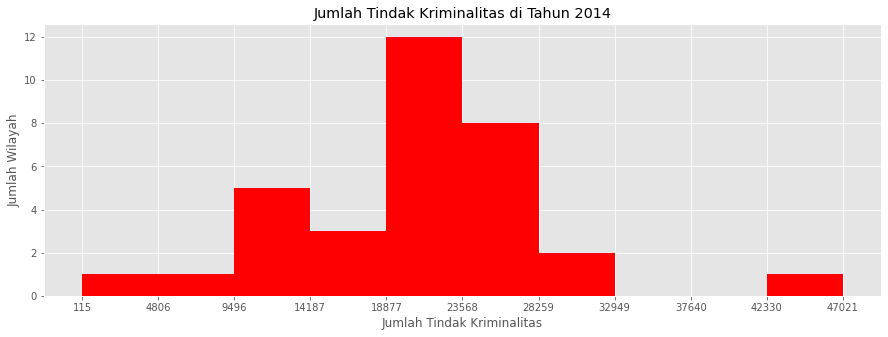

In [192]:
df_london_pivot[2014].plot(
    kind='hist',
    figsize=(15,5), 
    xticks=bin_edges,
    color=['red'])

plt.title('Jumlah Tindak Kriminalitas di Tahun 2014')
plt.xlabel('Jumlah Tindak Kriminalitas')
plt.ylabel('Jumlah Frekuensi Tindak Kriminal')

## <p style="color:green;"> Insight

Berdasarkan grafik di atas, dapat dilihat bahwa kasus kriminalitas paling rendah ada di 115 untuk tahun 2014

## <p style="color:blue;"> >> Bar Chart </p>

### <p style="color:red;"> Q3 Mencari total tindakan kriminalitas tertinggi untuk major category dalam rentang waktu 2008 - 2016 </p>

In [212]:
df_london_bar = pd.DataFrame(df_london, columns= ['major_category','borough', 'year','value'])


In [213]:
df_london_bar.head()

,major_category,borough,year,value
0,Burglary,Croydon,2016,0
1,Violence Against the Person,Greenwich,2016,0
2,Violence Against the Person,Bromley,2015,0
3,Burglary,Redbridge,2016,0
4,Robbery,Wandsworth,2008,0


In [214]:
df_major_crime = df_london_bar.groupby(['major_category'])['value'].sum()
df_major_crime

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

In [215]:
df_year_crime = df_london_bar.groupby(['year'])['value'].sum()
df_year_crime.head()

year
2008    731448
2009    709879
2010    708611
2011    717859
2012    730424
Name: value, dtype: int64

Text(0, 0.5, 'Jumlah Tindakan Kriminal')

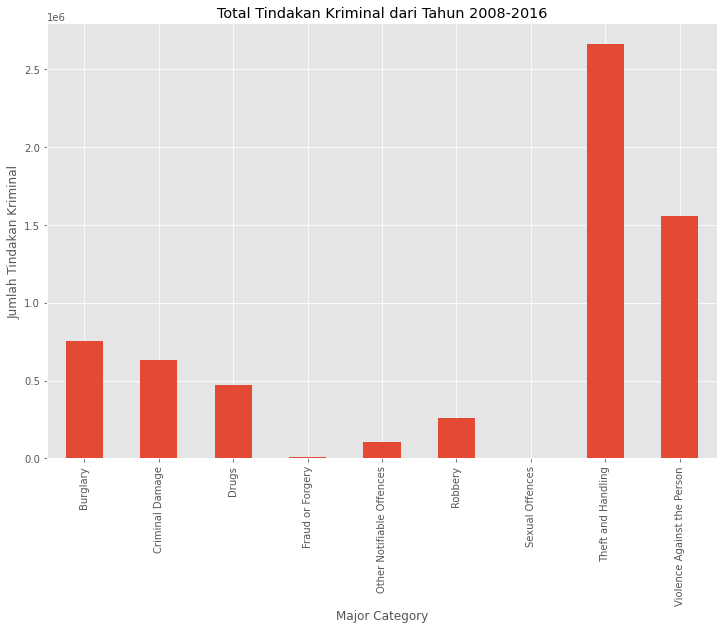

In [210]:
df_major_crime.plot(
        kind='bar'
        ,figsize=(12,8))

plt.title('Total Tindakan Kriminal dari Tahun 2008-2016')
plt.xlabel('Major Category')
plt.ylabel('Jumlah Tindakan Kriminal')

## <p style="color:green;"> Insight </p>

Tingkat kriminalitas tertinggi untuk major category pada tahun 2008 - 2016 ada pada Theft and Handling

## <p style="color:blue;"> >> Pie Chart </p>

### <p style="color:red;"> Q4 Melihat persentase tindakan kriminalitas di Borough pada tahun 2008-2016 </p>

In [226]:
df_london_pie=df_london.groupby('major_category', as_index=True).agg({"value":"sum"}).sort_values(by=['value'],ascending=[False])

(-1.229113215012612,
 1.2158795239057794,
 -1.2407020891490252,
 1.211461984095979)

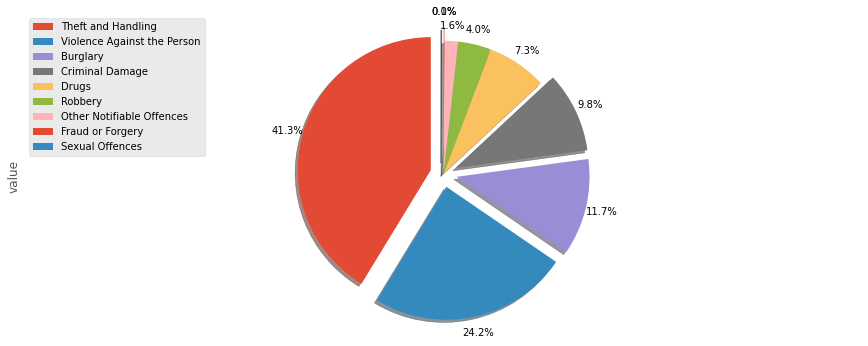

In [240]:
explode_list = [0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0, 0.1, 0.1]

df_london_pie.plot(y='value',
                    kind='pie',
                   figsize=(15,6),
                   autopct='%1.1f%%',
                   startangle=90,
                   shadow=True,
                   labels=None,
                   explode=explode_list,
                   pctdistance=1.12)

plt.legend(labels = df_london_pie.index, loc='upper left')
plt.axis('equal')

## <p style="color:green;"> Insight </p>

Tingkat tindak kriminalitas tertinggi pada rentang tahun 2008 - 2016 adalah theft and handling. Sedangkan tindak kriminalitas terendah pada tahun 2008-2016 adalah sexual offences

## <p style="color:blue;"> >> Box Plot </p>

### <p style="color:red;"> Q5 Nilai median dari tindakan kriminalitas di Croydon </p>

In [300]:
df_london_pivot.loc[['Croydon']].sum().describe

<bound method NDFrame.describe of year
2008      29240.0
2009      29554.0
2010      29075.0
2011      29522.0
2012      29921.0
2013      27072.0
2014      27064.0
2015      27788.0
2016      28441.0
2008        276.0
2009        230.0
200=          0.0
2010        298.0
2011        308.0
2012        268.0
2013        372.0
2014        293.0
2015        301.0
2016        271.0
Total    520588.0
dtype: float64>

In [302]:
df_london_box = df_london_pivot.loc[['Croydon']].transpose()
df_london_box = df_london_box.drop(['Total'])

<AxesSubplot:>

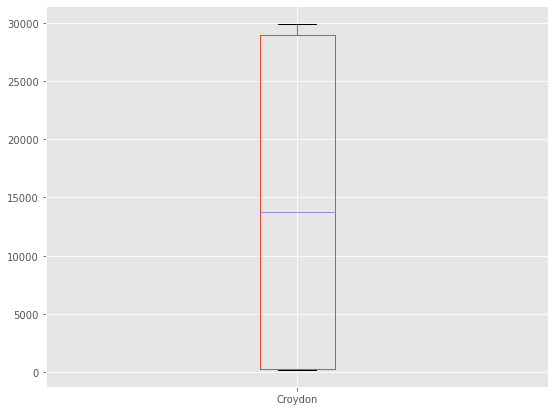

In [303]:
df_london_box.plot(kind='box',
             figsize=(9,7))

##  <p style="color:green;"> Insight </p>

Berdasarkan box plot diatas, nilai median dari tindakan kriminalitas di Croydon pada tahun 2008 - 2016 sekitar 14000 tindakan kriminalitas

## <p style="color:blue;"> >> World Clouds </p>

### <p style="color:red;"> Q6 Kata yang paling sering muncul dalam data </p>

In [272]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [273]:
stopwords = set(STOPWORDS)
from PIL import Image

In [274]:
df_bor= pd.DataFrame(df_london, columns = ['borough', 'major_category','year','value'])

df_bor.head()

,borough,major_category,year,value
0,Croydon,Burglary,2016,0
1,Greenwich,Violence Against the Person,2016,0
2,Bromley,Violence Against the Person,2015,0
3,Redbridge,Burglary,2016,0
4,Wandsworth,Robbery,2008,0


In [278]:
df_newbor = df_bor[['borough', 'value']].groupby(['borough'], as_index= True).sum()
df_newbor.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [279]:
total_kriminalitas = df_bor['value'].sum()
total_kriminalitas

6447758

In [289]:
max_words = 100
word_kata = ''
for borough in df_newbor.index.values:
  
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_newbor.loc[borough, 'value']/float(total_kriminalitas)*max_words)
        word_kata = word_kata + ((borough + ' ') * repeat_num_times)
                                     

word_kata

'Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

In [290]:
word_cloud = WordCloud(background_color='white').generate(word_kata)

print('Word cloud created!')

Word cloud created!


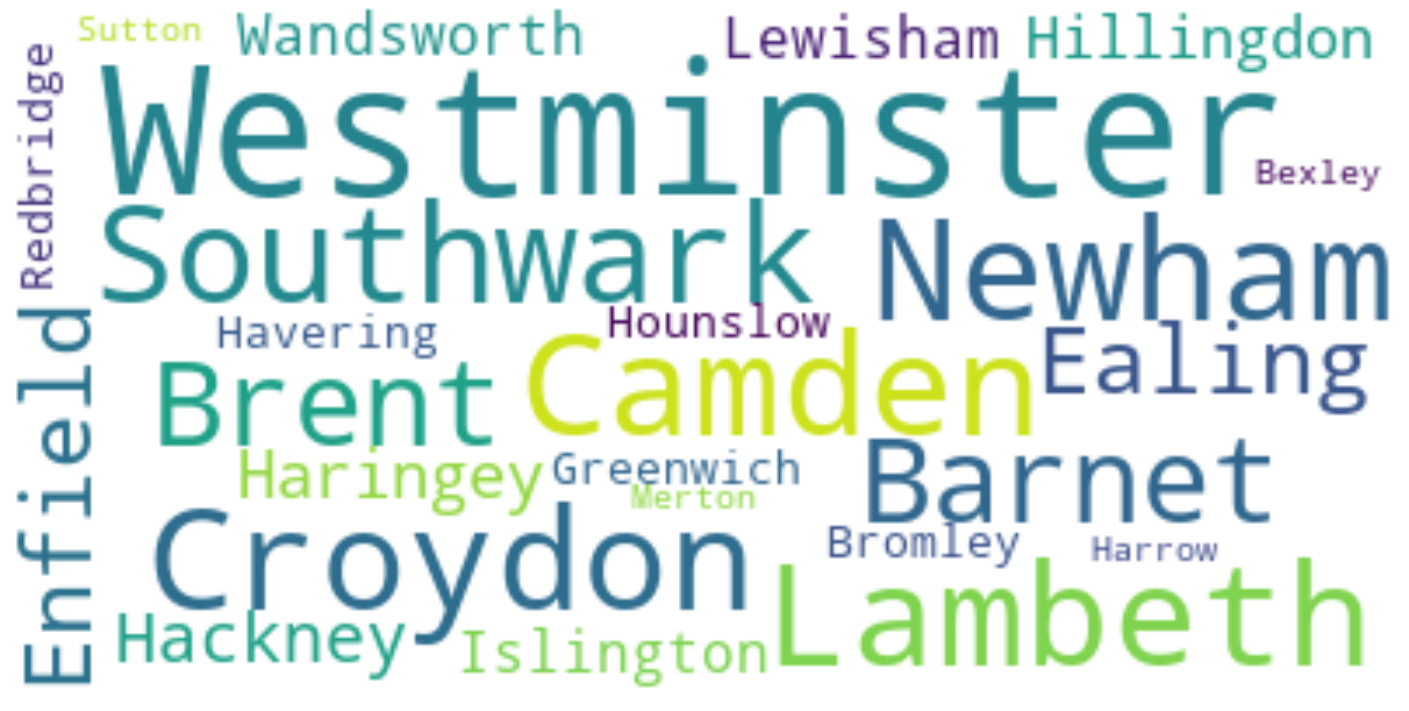

In [291]:
fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(15)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### <p style="color:green;"> Insight </p>

Dapat dilihat pada Cloud diatas bahwa kata Westminster,Croydon juga Southwark adalah kata yang paling sering muncul dalam data

## <p style="color:blue;"> >> Folium </p>

### <p style="color:red;"> Q7 Peta Area London </p>

In [293]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [294]:
limit = 100
df_london=df_london.iloc[0:limit,:]

df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
95,E01002093,Haringey,Violence Against the Person,Harassment,1,2012,3
96,E01002374,Havering,Robbery,Personal Property,0,2009,8
97,E01004142,Sutton,Burglary,Burglary in Other Buildings,3,2013,5
98,E01000401,Bexley,Violence Against the Person,Wounding/GBH,0,2011,4


In [295]:
latitude = 51.50853
longitudes = -0.12574

In [296]:
peta_london = folium.Map(location=[latitude,longitudes],zoom_start=12)

In [297]:
peta_london

### <p style="color:green;"> Insight </p>

Gambar diatas merupakan peta dari London

## <p style="color:blue;"> Finish. Alhamdulillah selesai </p>